**RAG Retrieval-Augmented Generation** is a method where we help the LLM (like GPT) by giving it extra knowledge — information that is not in its training data.

“Give the LLM some reference books before it answers your question.”

You give LLM extra knowledge from your own documents or database during inference.

**How RAG works (simple steps):**

1️⃣ You have documents (PDF, Word, Web pages, etc.)

2️⃣ You split those documents into small parts (called chunks)
👉 Using TextSplitter

3️⃣ Convert each chunk into numbers (vectors)
👉 Using Embeddings (OpenAI, BGE, etc.)

4️⃣ Store these vectors in a Vector Store
👉 Chroma, Pinecone, FAISS, etc.

5️⃣ When user asks a question:

Convert the question into vector

Find similar chunks from the vector store

Send both: the question + retrieved chunks to LLM

6️⃣ LLM reads the context and gives a much better answer.



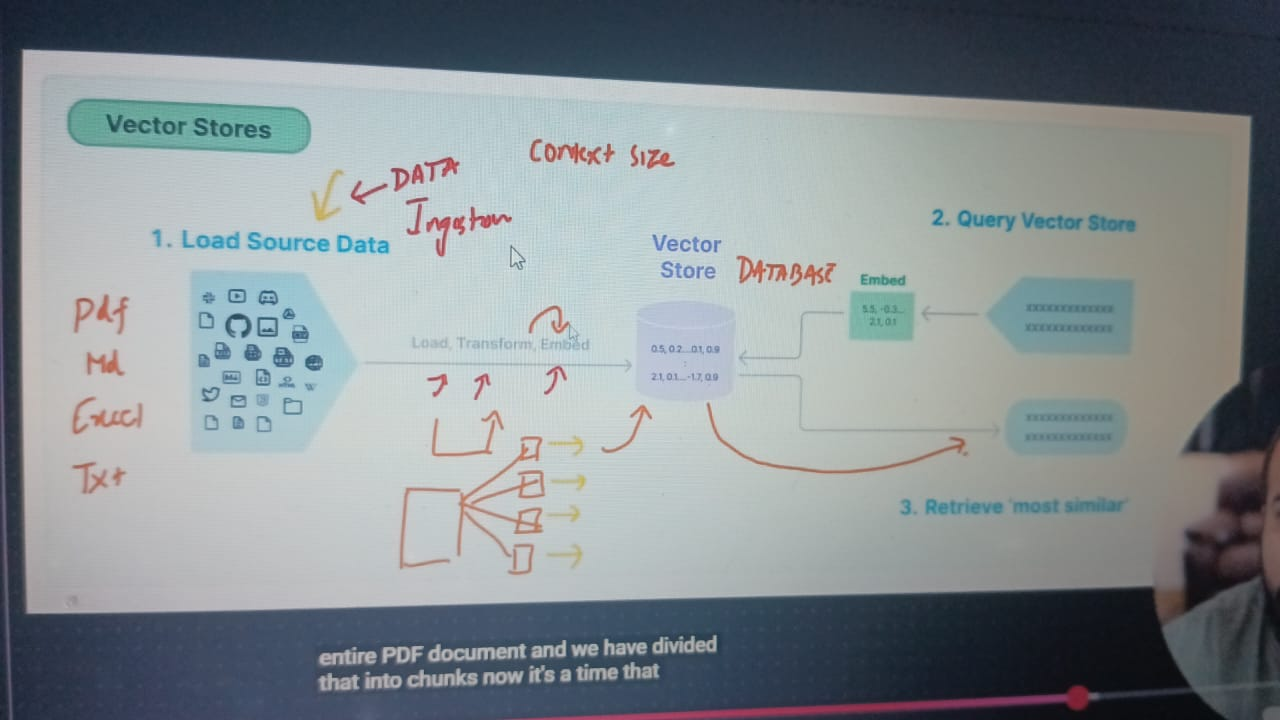

In [ ]:
#data ingestion
#different menthod to read/load different files type like pdf , txt file, web contetnt
#document_loaders	A submodule that provides various document loaders for different file types (txt, pdf, csv, html, etc.).
# TextLoader A class specifically designed to load plain text files (.txt files).

from langchain_community.document_loaders import TextLoader
loader=TextLoader("speech.txt")
text_documents=loader.load()
text_documents

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['OPENAI_API_KEY']=os.getenv("OPENAI_API_KEY")

In [ ]:
# web based loader
from langchain_community.document_loaders import WebBaseLoader
import bs4  #beautiful soup  is a Python library used to parse and process HTML or XML documents.

## load,chunk and index the content of the html page

loader=WebBaseLoader(web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),   #This is the URL of the web page you want to scrape.
                     bs_kwargs=dict(parse_only=bs4.SoupStrainer(    #SoupStrainer- Parses only selected tags or attributes
                         class_=("post-title","post-content","post-header")  #tags in html

                     )))

text_documents=loader.load()

In [ ]:
## Pdf reader
from langchain_community.document_loaders import PyPDFLoader
loader=PyPDFLoader('attention.pdf')
docs=loader.load()

In [ ]:
#spliting text into chunks
from langchain.text_splitter import RecursiveCharacterTextSplitter #It is a smart document chunker designed for LLM pipelines.Take large text documents.
#RecursiveCharacterTextSplitter -Break them into smaller, manageable chunks.Try to split on natural boundaries (paragraphs, sentences, words).Avoid splitting in the middle of sentences whenever possible.
text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
#chunk_size- Each chunk will be maximum ~1000 characters long
#chunk_overlap=200	Each chunk will overlap previous chunk by 200 characters

documents=text_splitter.split_documents(docs)
documents[:5]

**OpenAIEmbeddings**() class allows you to easily call OpenAI’s embedding API (like text-embedding-ada-002).

✅ What embeddings do:

Convert text into high-dimensional vectors (lists of floats).

Capture semantic meaning of the text.

Allow for similarity search in vector databases.

In [ ]:
#vector embeeding is technique to convert text into vector
#vector store - to store vector in
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma
db = Chroma.from_documents(documents,OpenAIEmbeddings())

In [ ]:
query = "Who are the authors of attention is all you need?"
retireved_results=db.similarity_search(query)  #Finds relevant context for LLM to answer accurately
print(retireved_results[0].page_content)

In [ ]:
## FAISS Vector Database
from langchain_community.vectorstores import FAISS
db = FAISS.from_documents(documents[:15], OpenAIEmbeddings())

# How many vector stores are supported by LangChain?
As of 2024-2025, LangChain supports 25+ vector stores.

| Store                   | Speed           | Scalability      | Cost        | Ease of Use | When to Use                      |
| ----------------------- | --------------- | ---------------- | ----------- | ----------- | -------------------------------- |
| **Chroma**              | Fast            | Small scale      | Free        | Easiest     | Local experiments, prototypes    |
| **FAISS**               | Very fast       | Small-medium     | Free        | Easy        | Personal projects, local servers |
| **Pinecone**            | Fast            | Large scale      | Paid        | Easy        | SaaS, production-grade RAG       |
| **Weaviate**            | Fast            | Large scale      | Free & Paid | Medium      | Complex search, hybrid search    |
| **Milvus**              | Very fast       | Enterprise scale | Free & Paid | Medium      | High-volume embeddings           |
| **Qdrant**              | Fast            | Mid-scale        | Free & Paid | Easy        | Mid-sized production RAG         |
| **Redis**               | Fast            | Mid-scale        | Free & Paid | Easy        | When you already use Redis stack |
| **PGVector (Postgres)** | Medium          | Mid-scale        | Free        | Easy        | When you already have Postgres   |
| **Elasticsearch**       | Search + vector | Large            | Paid        | Complex     | Text + vector search hybrid      |


| Vector Store               | Type               | Hosting     | Open-source? |
| -------------------------- | ------------------ | ----------- | ------------ |
| **Chroma**                 | Lightweight        | Local       | ✅ Yes        |
| **FAISS**                  | Lightweight        | Local       | ✅ Yes        |
| **Pinecone**               | Scalable SaaS      | Cloud       | ❌ No         |
| **Weaviate**               | Scalable           | Cloud/Local | ✅ Yes        |
| **Milvus**                 | Scalable           | Cloud/Local | ✅ Yes        |
| **Redis**                  | In-memory          | Cloud/Local | ✅ Yes        |
| **Qdrant**                 | Scalable           | Cloud/Local | ✅ Yes        |
| **Elasticsearch**          | Search engine      | Cloud/Local | ✅ Yes        |
| **Azure Cognitive Search** | Cloud              | Azure       | ❌ No         |
| **Supabase**               | Lightweight        | Cloud       | ✅ Yes        |
| **Postgres + PGVector**    | Database extension | Local/Cloud | ✅ Yes        |
| **OpenSearch**             | Search engine      | AWS         | ✅ Yes        |
